# Topic: Ecommerce Product Recommendation Collaborative
**Recommend products based on what similar users purchased**

**Done by Nikhil Danbahadur Saroj**


# Data Importing

In [180]:
import pandas as pd

# Load the dataset
file_path = 'Ecommerce_product_recommendation.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data

,Unnamed: 0,User_ID,Age,Gender,Location,Income,Interests,Last_Login_Days_Ago,Purchase_Frequency,Average_Order_Value,Total_Spending,Product_Category_Preference,Time_Spent_on_Site_Minutes,Pages_Viewed,Newsletter_Subscription
0,0,#1,56,Male,Suburban,38037,Sports,5,7,18,2546,Books,584,38,True
1,1,#2,46,Female,Rural,103986,Technology,15,7,118,320,Electronics,432,40,False
2,2,#3,32,Female,Suburban,101942,Sports,28,1,146,3766,Apparel,306,1,True
3,3,#4,60,Female,Suburban,71612,Fashion,18,3,163,4377,Apparel,527,29,False
4,4,#5,25,Male,Suburban,49725,Travel,2,5,141,4502,Health & Beauty,53,10,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,#996,22,Male,Urban,104162,Technology,18,7,83,607,Apparel,542,21,False
996,996,#997,40,Male,Urban,99003,Travel,16,3,180,431,Apparel,359,4,True
997,997,#998,27,Female,Urban,72395,Technology,8,8,130,650,Books,331,34,False
998,998,#999,61,Male,Rural,59758,Travel,1,3,152,1041,Electronics,427,28,True


# Data Cleaning 

In [174]:
import pandas as pd

# Load the dataset


# Display basic information about the dataset
data.info()

# Display the first few rows
data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Unnamed: 0                   1000 non-null   int64 
 1   User_ID                      1000 non-null   object
 2   Age                          1000 non-null   int64 
 3   Gender                       1000 non-null   object
 4   Location                     1000 non-null   object
 5   Income                       1000 non-null   int64 
 6   Interests                    1000 non-null   object
 7   Last_Login_Days_Ago          1000 non-null   int64 
 8   Purchase_Frequency           1000 non-null   int64 
 9   Average_Order_Value          1000 non-null   int64 
 10  Total_Spending               1000 non-null   int64 
 11  Product_Category_Preference  1000 non-null   object
 12  Time_Spent_on_Site_Minutes   1000 non-null   int64 
 13  Pages_Viewed                 1000 

,Unnamed: 0,User_ID,Age,Gender,Location,Income,Interests,Last_Login_Days_Ago,Purchase_Frequency,Average_Order_Value,Total_Spending,Product_Category_Preference,Time_Spent_on_Site_Minutes,Pages_Viewed,Newsletter_Subscription
0,0,#1,56,Male,Suburban,38037,Sports,5,7,18,2546,Books,584,38,True
1,1,#2,46,Female,Rural,103986,Technology,15,7,118,320,Electronics,432,40,False
2,2,#3,32,Female,Suburban,101942,Sports,28,1,146,3766,Apparel,306,1,True
3,3,#4,60,Female,Suburban,71612,Fashion,18,3,163,4377,Apparel,527,29,False
4,4,#5,25,Male,Suburban,49725,Travel,2,5,141,4502,Health & Beauty,53,10,True


In [175]:
# Check for missing values
missing_values = data.isnull().sum()
print(missing_values)


Unnamed: 0                     0
User_ID                        0
Age                            0
Gender                         0
Location                       0
Income                         0
Interests                      0
Last_Login_Days_Ago            0
Purchase_Frequency             0
Average_Order_Value            0
Total_Spending                 0
Product_Category_Preference    0
Time_Spent_on_Site_Minutes     0
Pages_Viewed                   0
Newsletter_Subscription        0
dtype: int64


In [176]:
print("\nUnique Value Counts for Each Column:")
for column in data.columns:
    unique_values = data[column].unique()
    print(f"Unique values in '{column}': {len(unique_values)}")


Unique Value Counts for Each Column:
Unique values in 'Unnamed: 0': 1000
Unique values in 'User_ID': 1000
Unique values in 'Age': 47
Unique values in 'Gender': 2
Unique values in 'Location': 3
Unique values in 'Income': 996
Unique values in 'Interests': 5
Unique values in 'Last_Login_Days_Ago': 29
Unique values in 'Purchase_Frequency': 10
Unique values in 'Average_Order_Value': 189
Unique values in 'Total_Spending': 908
Unique values in 'Product_Category_Preference': 5
Unique values in 'Time_Spent_on_Site_Minutes': 491
Unique values in 'Pages_Viewed': 49
Unique values in 'Newsletter_Subscription': 2


In [177]:
# Example: Drop rows with missing values
data_cleaned = data.dropna()



In [178]:
# One-hot encode categorical variables
data_encoded = pd.get_dummies(data_cleaned, columns=['Gender', 'Location', 'Interests', 'Product_Category_Preference', 'Newsletter_Subscription'])
data_encoded

,Unnamed: 0,User_ID,Age,Income,Last_Login_Days_Ago,Purchase_Frequency,Average_Order_Value,Total_Spending,Time_Spent_on_Site_Minutes,Pages_Viewed,...,Interests_Sports,Interests_Technology,Interests_Travel,Product_Category_Preference_Apparel,Product_Category_Preference_Books,Product_Category_Preference_Electronics,Product_Category_Preference_Health & Beauty,Product_Category_Preference_Home & Kitchen,Newsletter_Subscription_False,Newsletter_Subscription_True
0,0,#1,56,38037,5,7,18,2546,584,38,...,True,False,False,False,True,False,False,False,False,True
1,1,#2,46,103986,15,7,118,320,432,40,...,False,True,False,False,False,True,False,False,True,False
2,2,#3,32,101942,28,1,146,3766,306,1,...,True,False,False,True,False,False,False,False,False,True
3,3,#4,60,71612,18,3,163,4377,527,29,...,False,False,False,True,False,False,False,False,True,False
4,4,#5,25,49725,2,5,141,4502,53,10,...,False,False,True,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,#996,22,104162,18,7,83,607,542,21,...,False,True,False,True,False,False,False,False,True,False
996,996,#997,40,99003,16,3,180,431,359,4,...,False,False,True,True,False,False,False,False,False,True
997,997,#998,27,72395,8,8,130,650,331,34,...,False,True,False,False,True,False,False,False,True,False
998,998,#999,61,59758,1,3,152,1041,427,28,...,False,False,True,False,False,True,False,False,False,True


In [181]:
data_cleaned

,Unnamed: 0,User_ID,Age,Gender,Location,Income,Interests,Last_Login_Days_Ago,Purchase_Frequency,Average_Order_Value,Total_Spending,Product_Category_Preference,Time_Spent_on_Site_Minutes,Pages_Viewed,Newsletter_Subscription
0,0,#1,56,Male,Suburban,38037,Sports,5,7,18,2546,Books,584,38,True
1,1,#2,46,Female,Rural,103986,Technology,15,7,118,320,Electronics,432,40,False
2,2,#3,32,Female,Suburban,101942,Sports,28,1,146,3766,Apparel,306,1,True
3,3,#4,60,Female,Suburban,71612,Fashion,18,3,163,4377,Apparel,527,29,False
4,4,#5,25,Male,Suburban,49725,Travel,2,5,141,4502,Health & Beauty,53,10,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,#996,22,Male,Urban,104162,Technology,18,7,83,607,Apparel,542,21,False
996,996,#997,40,Male,Urban,99003,Travel,16,3,180,431,Apparel,359,4,True
997,997,#998,27,Female,Urban,72395,Technology,8,8,130,650,Books,331,34,False
998,998,#999,61,Male,Rural,59758,Travel,1,3,152,1041,Electronics,427,28,True


In [182]:
# Create user-item interaction matrix using original data
interaction_matrix = data_cleaned.pivot_table(
    index='User_ID', 
    columns='Product_Category_Preference', 
    values='Purchase_Frequency', 
    aggfunc='sum',  # Use sum to aggregate purchase frequency
    fill_value=0
)

# Display the interaction matrix
print("User-Item Interaction Matrix:\n", interaction_matrix.head())


User-Item Interaction Matrix:
 Product_Category_Preference  Apparel  Books  Electronics  Health & Beauty  \
User_ID                                                                     
#1                                 0      7            0                0   
#10                                0      0            8                0   
#100                               7      0            0                0   
#1000                              0      0            0                7   
#101                               0      0            0                5   

Product_Category_Preference  Home & Kitchen  
User_ID                                      
#1                                        0  
#10                                       0  
#100                                      0  
#1000                                     0  
#101                                      0  


# EDA

In [185]:
# Summary statistics
print("Summary statistics:\n")
data_cleaned.describe(include='all')

Summary statistics:



,Unnamed: 0,User_ID,Age,Gender,Location,Income,Interests,Last_Login_Days_Ago,Purchase_Frequency,Average_Order_Value,Total_Spending,Product_Category_Preference,Time_Spent_on_Site_Minutes,Pages_Viewed,Newsletter_Subscription
count,1000.000000,1000,1000.000000,1000,1000,1000.000000,1000,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000.000000,1000.00000,1000
unique,NaN,1000,NaN,2,3,NaN,5,NaN,NaN,NaN,NaN,5,NaN,NaN,2
top,NaN,#1,NaN,Male,Suburban,NaN,Sports,NaN,NaN,NaN,NaN,Apparel,NaN,NaN,True
freq,NaN,1,NaN,526,349,NaN,213,NaN,NaN,NaN,NaN,218,NaN,NaN,507
mean,499.500000,NaN,40.986000,NaN,NaN,81304.732000,NaN,15.586000,4.631000,104.039000,2552.957000,NaN,297.360000,24.40300,NaN
std,288.819436,NaN,13.497852,NaN,NaN,37363.972753,NaN,8.205604,2.837762,54.873569,1420.985048,NaN,175.596123,14.02017,NaN
min,0.000000,NaN,18.000000,NaN,NaN,20155.000000,NaN,1.000000,0.000000,10.000000,112.000000,NaN,2.000000,1.00000,NaN
25%,249.750000,NaN,29.000000,NaN,NaN,48715.500000,NaN,8.000000,2.000000,58.000000,1271.750000,NaN,144.000000,12.00000,NaN
50%,499.500000,NaN,42.000000,NaN,NaN,81042.000000,NaN,16.000000,5.000000,105.000000,2542.000000,NaN,292.500000,24.50000,NaN
75%,749.250000,NaN,52.000000,NaN,NaN,112694.500000,NaN,23.000000,7.000000,150.000000,3835.500000,NaN,449.250000,36.00000,NaN


In [186]:
data_cleaned.describe()

,Unnamed: 0,Age,Income,Last_Login_Days_Ago,Purchase_Frequency,Average_Order_Value,Total_Spending,Time_Spent_on_Site_Minutes,Pages_Viewed
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,499.500000,40.986000,81304.732000,15.586000,4.631000,104.039000,2552.957000,297.360000,24.40300
std,288.819436,13.497852,37363.972753,8.205604,2.837762,54.873569,1420.985048,175.596123,14.02017
min,0.000000,18.000000,20155.000000,1.000000,0.000000,10.000000,112.000000,2.000000,1.00000
25%,249.750000,29.000000,48715.500000,8.000000,2.000000,58.000000,1271.750000,144.000000,12.00000
50%,499.500000,42.000000,81042.000000,16.000000,5.000000,105.000000,2542.000000,292.500000,24.50000
75%,749.250000,52.000000,112694.500000,23.000000,7.000000,150.000000,3835.500000,449.250000,36.00000
max,999.000000,64.000000,149951.000000,29.000000,9.000000,199.000000,4999.000000,599.000000,49.00000


# Data Visualization

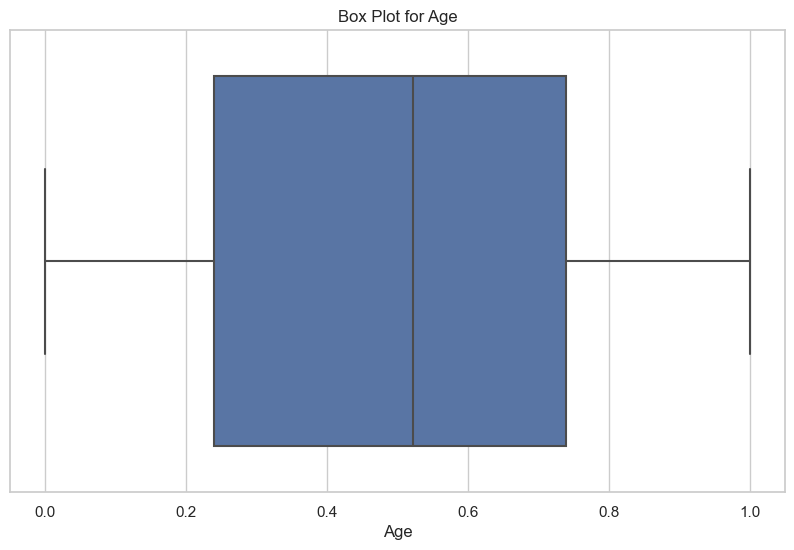

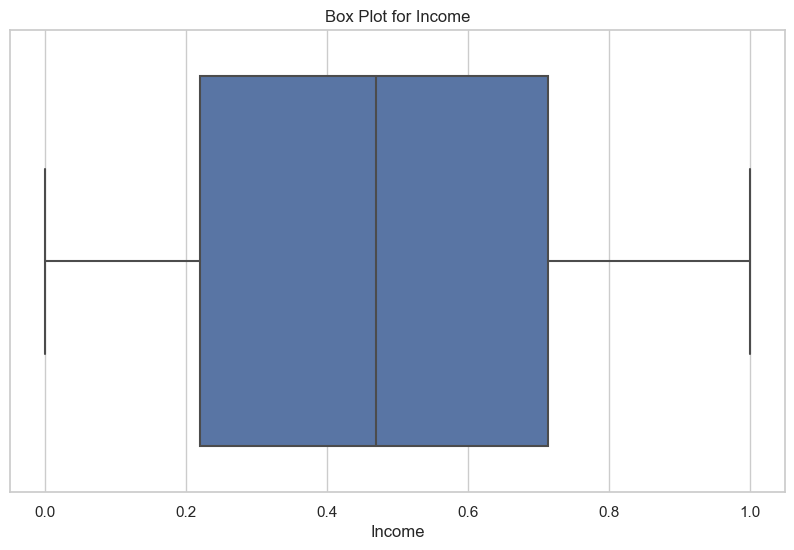

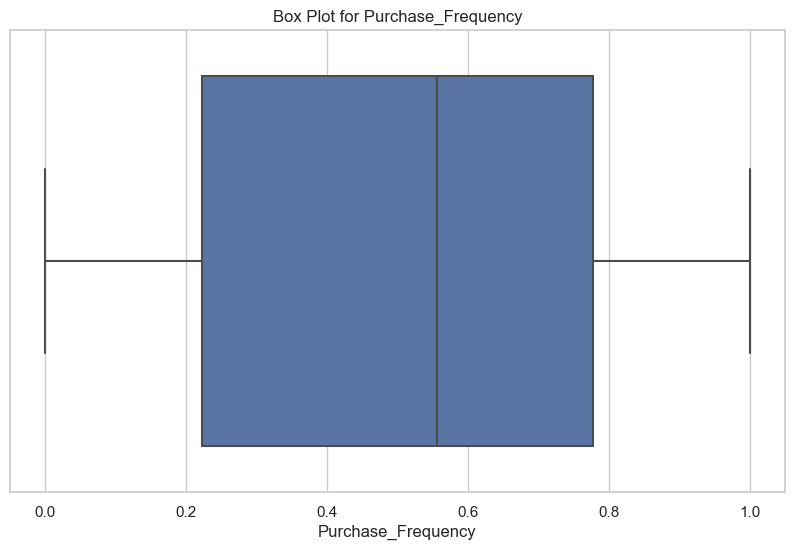

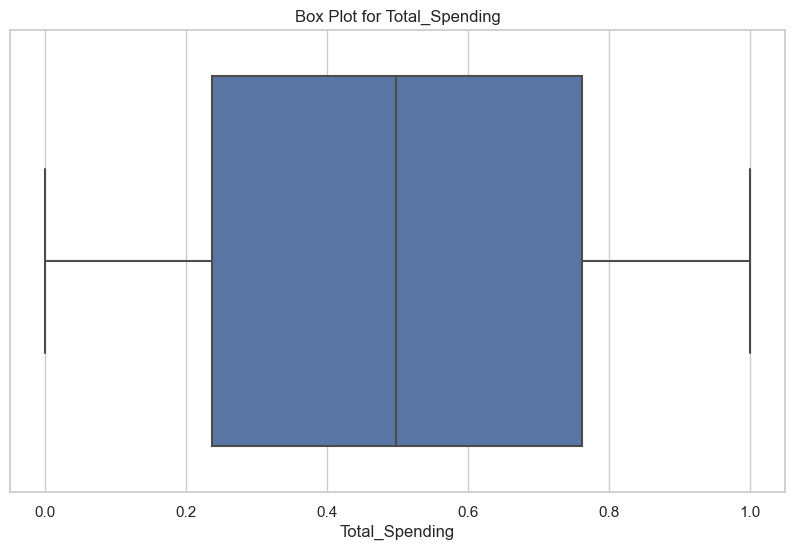

In [73]:
sns.set(style="whitegrid")

# Boxplot for numerical columns
numerical_columns = ['Age', 'Income', 'Purchase_Frequency', 'Total_Spending']
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=column, data=df)
    plt.title(f'Box Plot for {column}')
    plt.show()

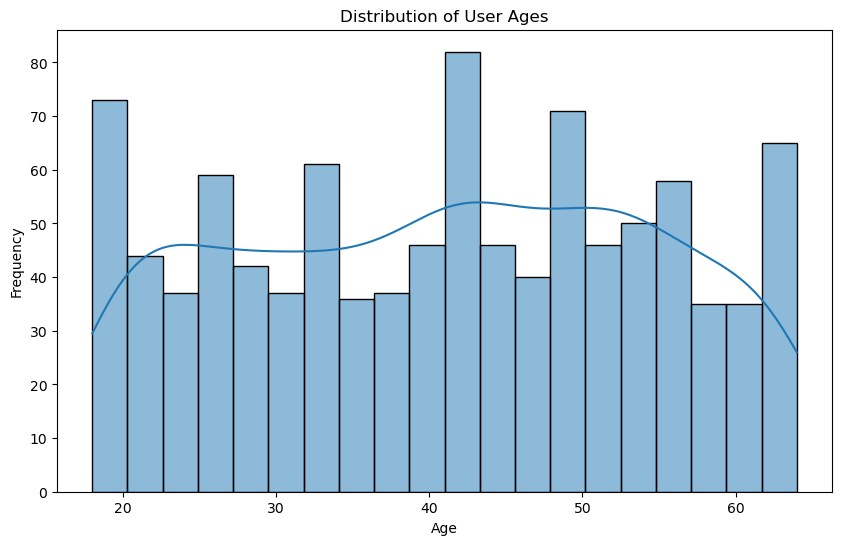

In [48]:
# 1. Distribution Analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['Age'], bins=20, kde=True)
plt.title('Distribution of User Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()






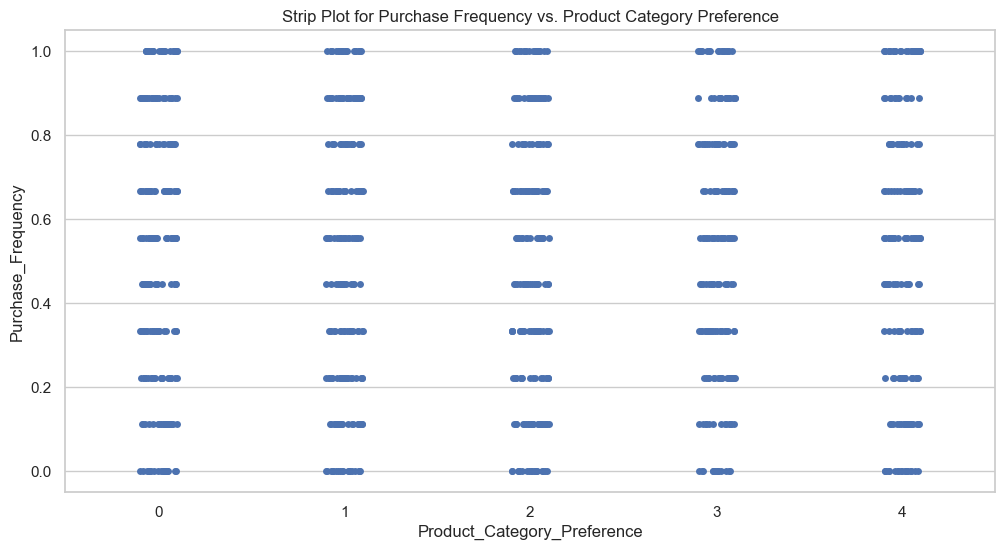

In [74]:
# Strip plot for purchase frequency vs. product category preference
plt.figure(figsize=(12, 6))
sns.stripplot(x='Product_Category_Preference', y='Purchase_Frequency', data=df, jitter=True)
plt.title('Strip Plot for Purchase Frequency vs. Product Category Preference')
plt.show()

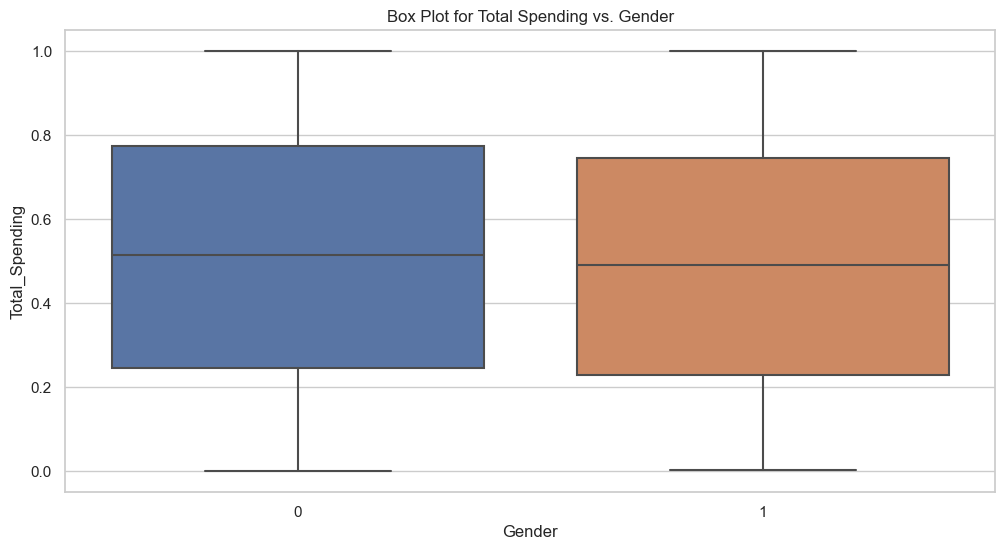

In [75]:
# Boxplot for total spending vs. gender
plt.figure(figsize=(12, 6))
sns.boxplot(x='Gender', y='Total_Spending', data=df)
plt.title('Box Plot for Total Spending vs. Gender')
plt.show()

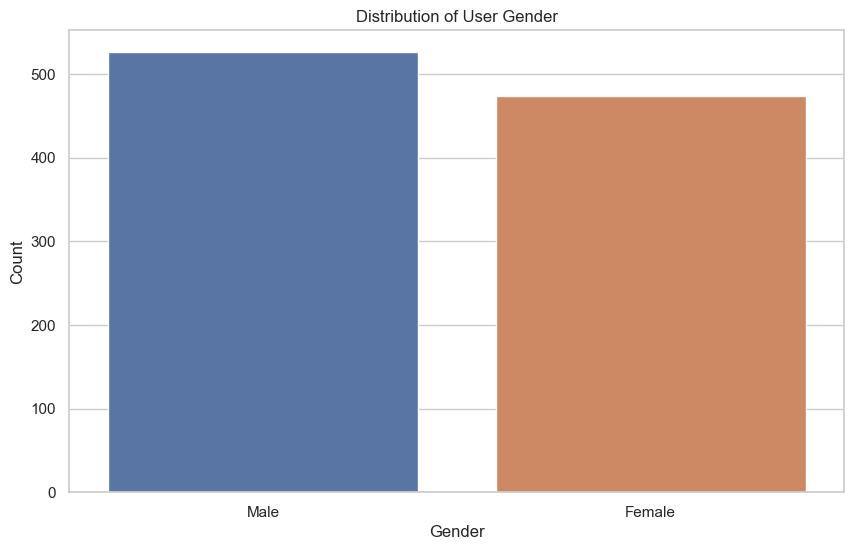

In [76]:
# Gender Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', data=data_cleaned)
plt.title('Distribution of User Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

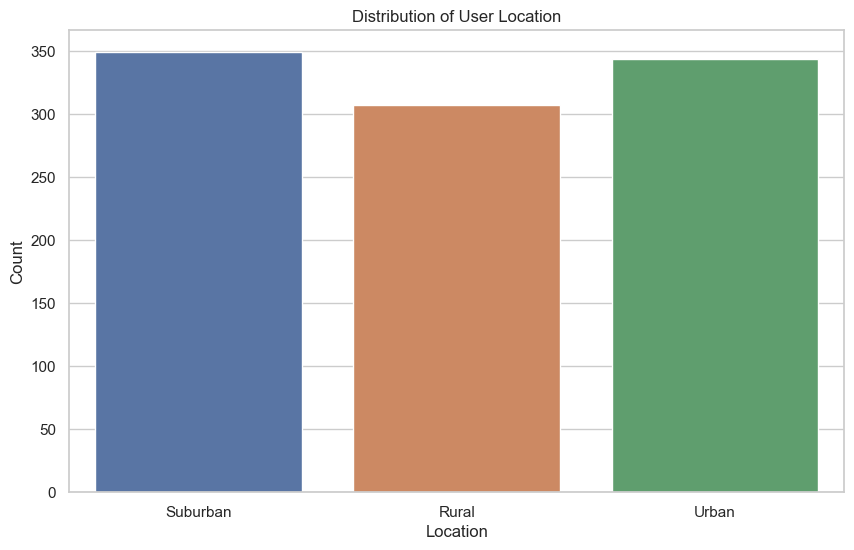

In [187]:
# Location Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Location', data=data_cleaned)
plt.title('Distribution of User Location')
plt.xlabel('Location')
plt.ylabel('Count')
plt.show()


















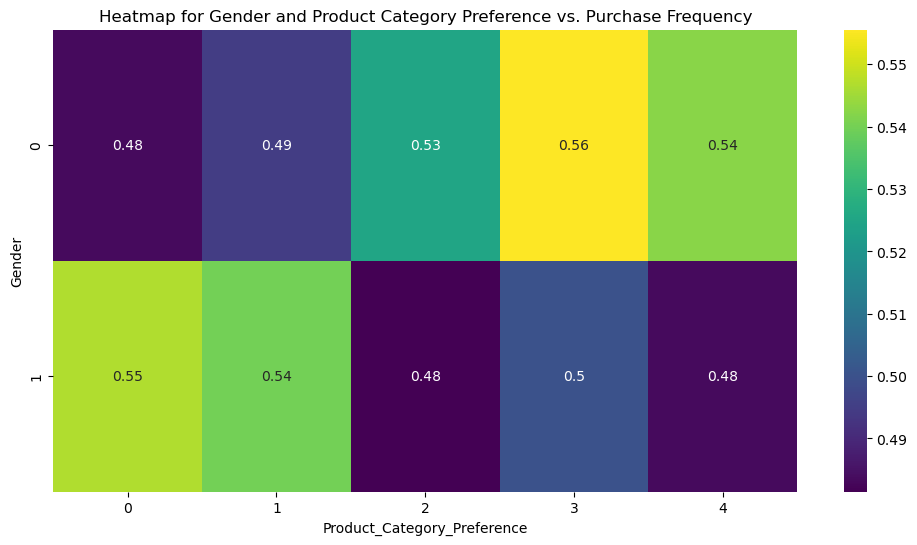

In [72]:
# Heatmap for gender and product category preference vs. purchase frequency
plt.figure(figsize=(12, 6))
pivot_table = df.pivot_table(index='Gender', columns='Product_Category_Preference', values='Purchase_Frequency', aggfunc='mean')
sns.heatmap(pivot_table, annot=True, cmap='viridis')
plt.title('Heatmap for Gender and Product Category Preference vs. Purchase Frequency')
plt.show()

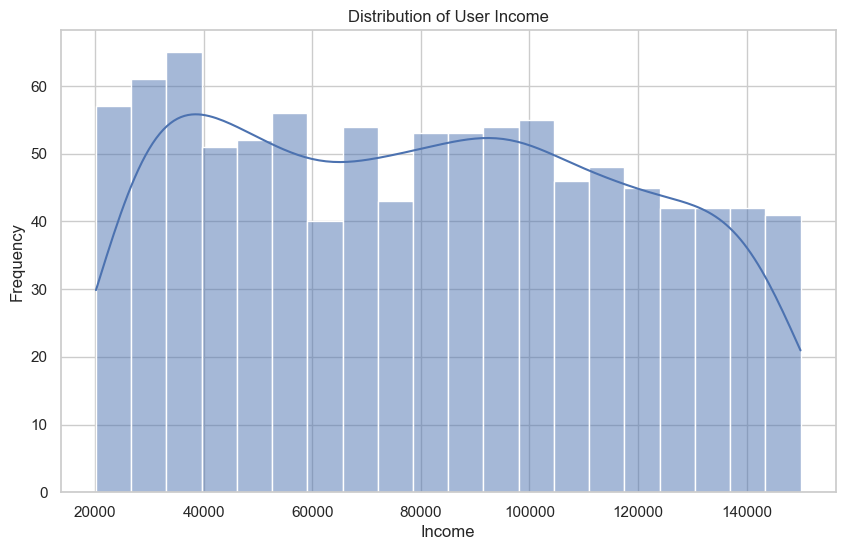

In [78]:
# Income Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['Income'], bins=20, kde=True)
plt.title('Distribution of User Income')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

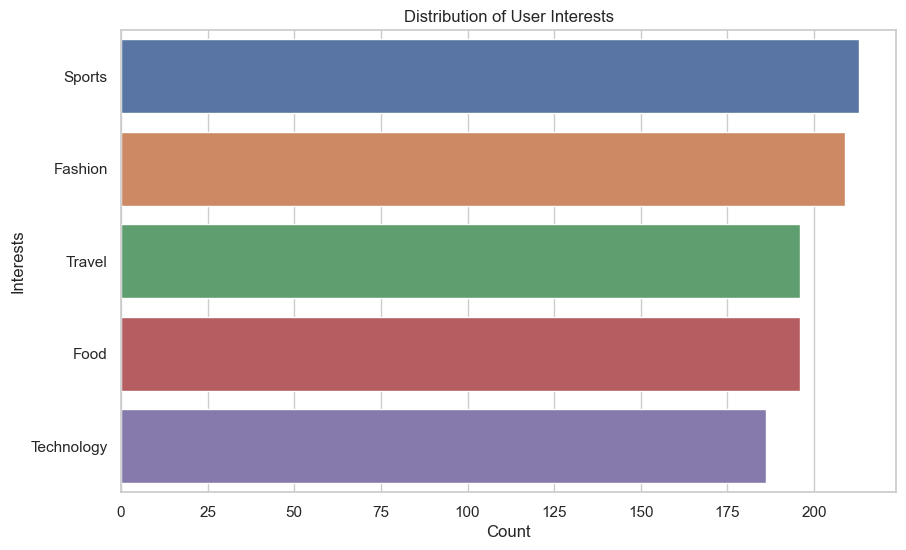

In [79]:
# Interests Distribution
plt.figure(figsize=(10, 6))
sns.countplot(y='Interests', data=data_cleaned, order=data_cleaned['Interests'].value_counts().index)
plt.title('Distribution of User Interests')
plt.xlabel('Count')
plt.ylabel('Interests')
plt.show()


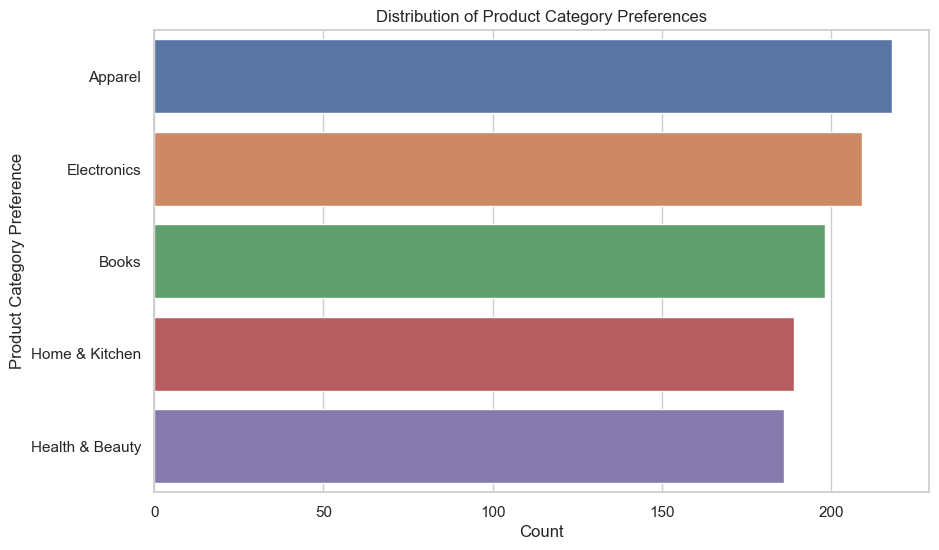

In [80]:
# Product Category Preference Distribution
plt.figure(figsize=(10, 6))
sns.countplot(y='Product_Category_Preference', data=data_cleaned, order=data_cleaned['Product_Category_Preference'].value_counts().index)
plt.title('Distribution of Product Category Preferences')
plt.xlabel('Count')
plt.ylabel('Product Category Preference')
plt.show()

In [54]:
# 2. Interaction Analysis

# Create user-item interaction matrix
interaction_matrix = data_cleaned.pivot_table(
    index='User_ID', 
    columns='Product_Category_Preference', 
    values='Purchase_Frequency', 
    aggfunc='sum', 
    fill_value=0
)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


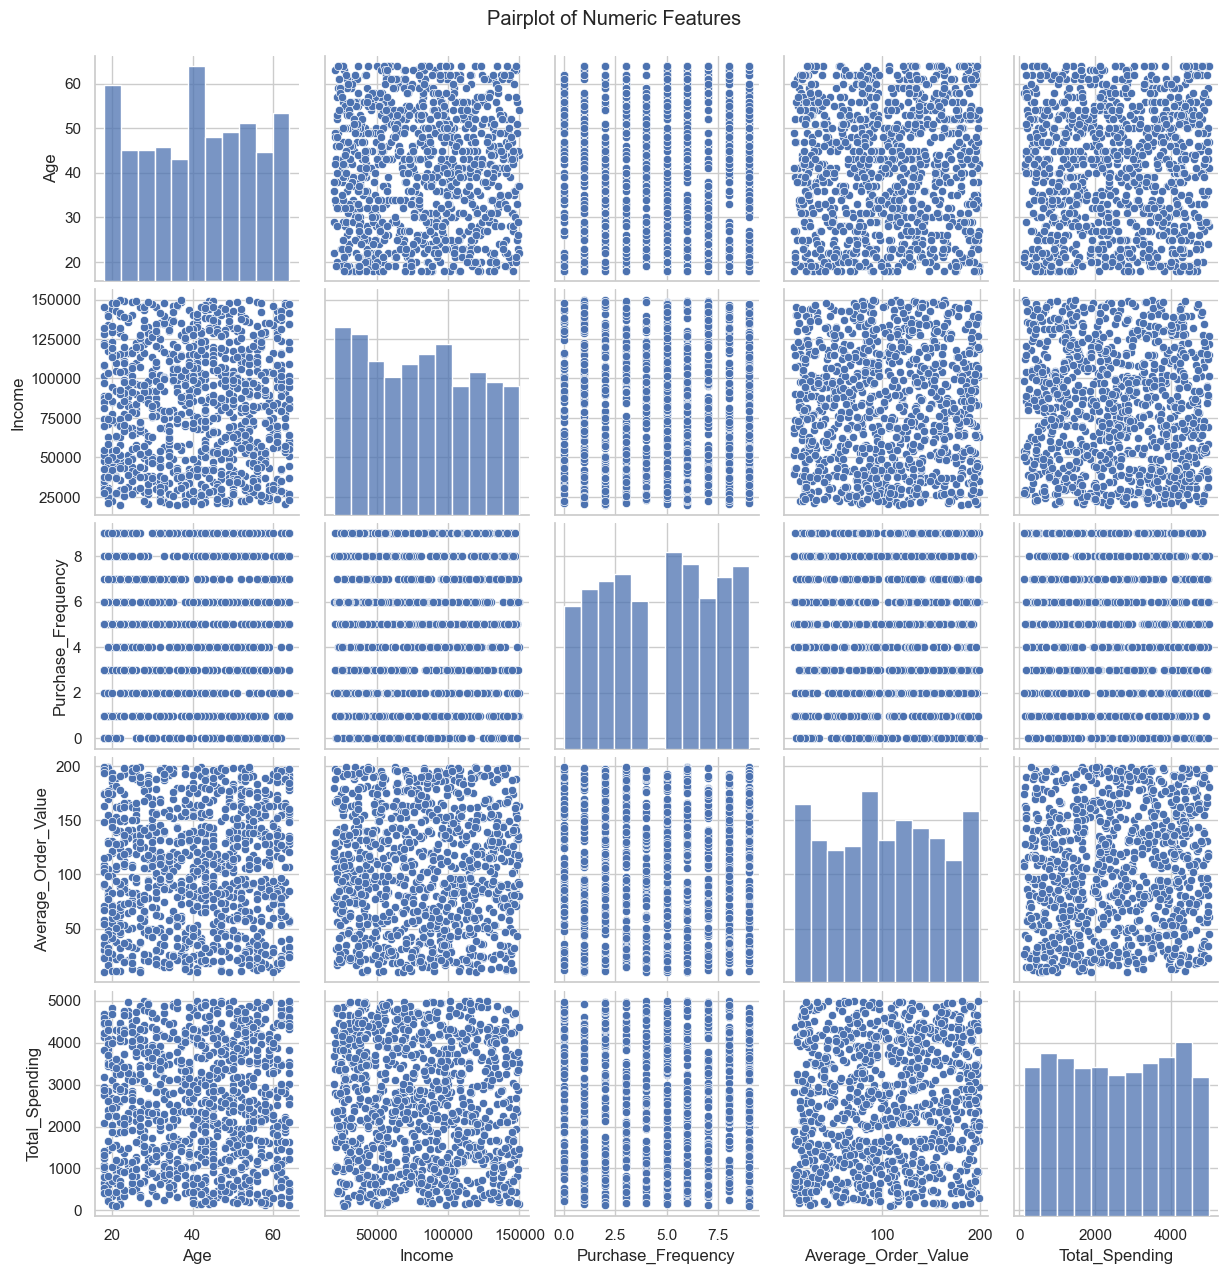

In [81]:
# Pairplot to visualize relationships between numeric features
sns.pairplot(data_cleaned[['Age', 'Income', 'Purchase_Frequency', 'Average_Order_Value', 'Total_Spending']])
plt.suptitle('Pairplot of Numeric Features', y=1.02)
plt.show()

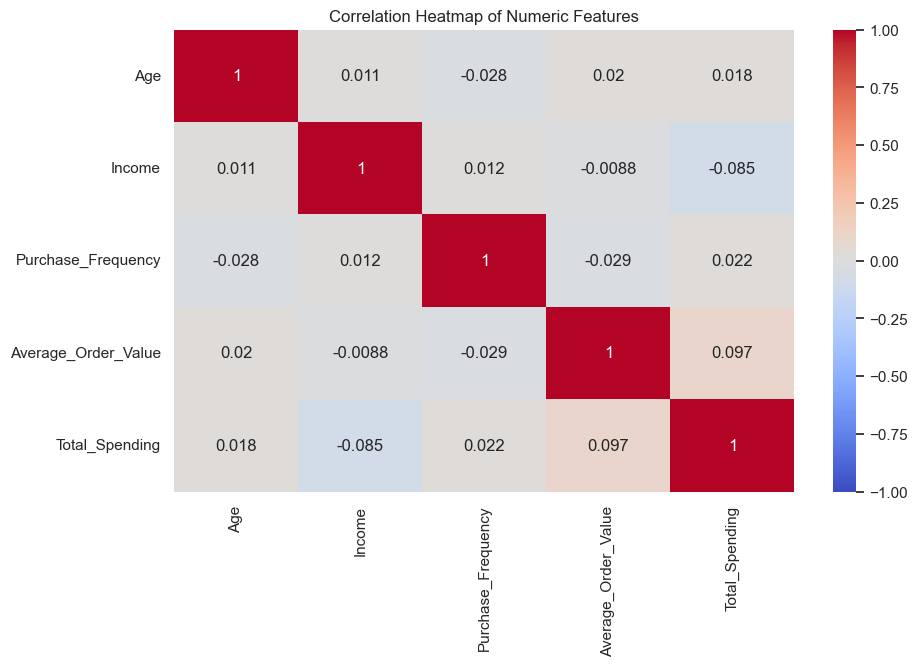

In [82]:

# Correlation heatmap of numeric features
plt.figure(figsize=(10, 6))
sns.heatmap(data_cleaned[['Age', 'Income', 'Purchase_Frequency', 'Average_Order_Value', 'Total_Spending']].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

In [188]:
data_cleaned

,Unnamed: 0,User_ID,Age,Gender,Location,Income,Interests,Last_Login_Days_Ago,Purchase_Frequency,Average_Order_Value,Total_Spending,Product_Category_Preference,Time_Spent_on_Site_Minutes,Pages_Viewed,Newsletter_Subscription
0,0,#1,56,Male,Suburban,38037,Sports,5,7,18,2546,Books,584,38,True
1,1,#2,46,Female,Rural,103986,Technology,15,7,118,320,Electronics,432,40,False
2,2,#3,32,Female,Suburban,101942,Sports,28,1,146,3766,Apparel,306,1,True
3,3,#4,60,Female,Suburban,71612,Fashion,18,3,163,4377,Apparel,527,29,False
4,4,#5,25,Male,Suburban,49725,Travel,2,5,141,4502,Health & Beauty,53,10,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,#996,22,Male,Urban,104162,Technology,18,7,83,607,Apparel,542,21,False
996,996,#997,40,Male,Urban,99003,Travel,16,3,180,431,Apparel,359,4,True
997,997,#998,27,Female,Urban,72395,Technology,8,8,130,650,Books,331,34,False
998,998,#999,61,Male,Rural,59758,Travel,1,3,152,1041,Electronics,427,28,True


# Dataset Preparation For the model

In [190]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Concatenate, Dense, Flatten
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Load and preprocess your dataset
df = pd.read_csv('Ecommerce_product_recommendation.csv')

# Select necessary features
selected_features = ['User_ID', 'Product_Category_Preference', 'Age', 'Gender', 'Location', 'Income', 'Interests', 'Total_Spending', 'Purchase_Frequency']
df = df[selected_features]

# Handle missing values if any (this step is important for data integrity)
df.fillna({'Age': df['Age'].median(), 'Income': df['Income'].mean(), 'Total_Spending': 0, 'Purchase_Frequency': 0}, inplace=True)

# Encode categorical variables
encoder = LabelEncoder()
df['Gender'] = encoder.fit_transform(df['Gender'].astype(str))
df['Location'] = encoder.fit_transform(df['Location'].astype(str))
df['Interests'] = encoder.fit_transform(df['Interests'].astype(str))

# Encode Product_Category_Preference and User_ID
df['Product_Category_Preference'] = encoder.fit_transform(df['Product_Category_Preference'])
df['User_ID'] = encoder.fit_transform(df['User_ID'])

# Normalize numerical features
scaler = MinMaxScaler()
df[['Age', 'Income', 'Total_Spending', 'Purchase_Frequency']] = scaler.fit_transform(df[['Age', 'Income', 'Total_Spending', 'Purchase_Frequency']])



In [191]:
df

,User_ID,Product_Category_Preference,Age,Gender,Location,Income,Interests,Total_Spending,Purchase_Frequency
0,0,1,0.826087,1,1,0.137770,2,0.498056,0.777778
1,112,2,0.608696,0,0,0.645867,3,0.042562,0.777778
2,223,0,0.304348,0,1,0.630120,2,0.747698,0.111111
3,334,0,0.913043,0,1,0.396445,0,0.872724,0.333333
4,445,3,0.152174,1,1,0.227819,4,0.898302,0.555556
...,...,...,...,...,...,...,...,...,...
995,996,0,0.086957,1,2,0.647223,3,0.101289,0.777778
996,997,0,0.478261,1,2,0.607476,4,0.065275,0.333333
997,998,1,0.195652,0,2,0.402478,3,0.110088,0.888889
998,999,2,0.934783,1,0,0.305117,4,0.190096,0.333333


# Model Building

# Using KMeans Clustering on df dataframe

In [192]:
from sklearn.cluster import KMeans

# Example: Clustering users into 3 clusters based on relevant features
features_for_clustering = ['Age', 'Gender', 'Location', 'Income', 'Interests']
kmeans = KMeans(n_clusters=2, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[features_for_clustering])


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [193]:
df

,User_ID,Product_Category_Preference,Age,Gender,Location,Income,Interests,Total_Spending,Purchase_Frequency,Cluster
0,0,1,0.826087,1,1,0.137770,2,0.498056,0.777778,0
1,112,2,0.608696,0,0,0.645867,3,0.042562,0.777778,0
2,223,0,0.304348,0,1,0.630120,2,0.747698,0.111111,0
3,334,0,0.913043,0,1,0.396445,0,0.872724,0.333333,1
4,445,3,0.152174,1,1,0.227819,4,0.898302,0.555556,0
...,...,...,...,...,...,...,...,...,...,...
995,996,0,0.086957,1,2,0.647223,3,0.101289,0.777778,0
996,997,0,0.478261,1,2,0.607476,4,0.065275,0.333333,0
997,998,1,0.195652,0,2,0.402478,3,0.110088,0.888889,0
998,999,2,0.934783,1,0,0.305117,4,0.190096,0.333333,0


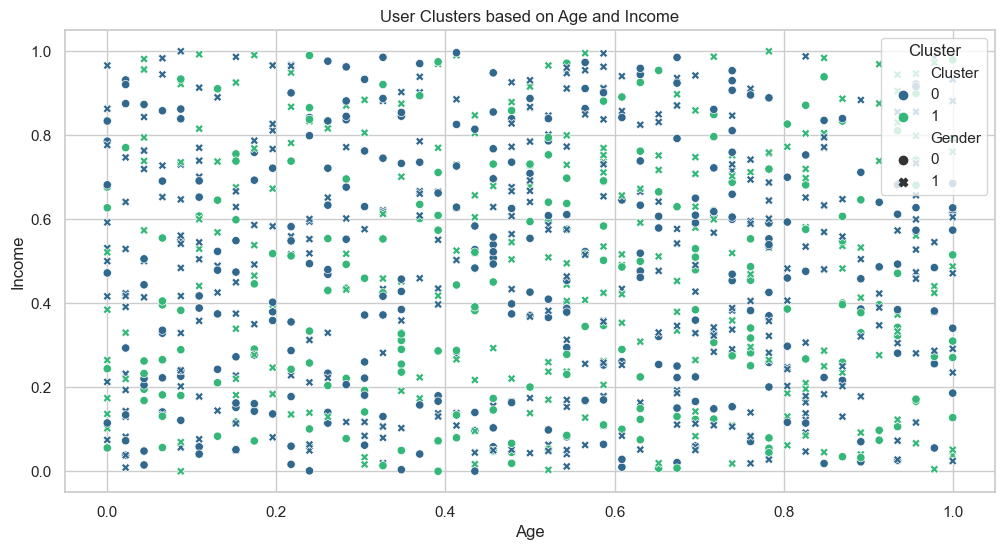

In [194]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming Age and Income are two features used for clustering
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Age', y='Income', hue='Cluster', palette='viridis', style='Gender')
plt.title('User Clusters based on Age and Income')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend(title='Cluster')
plt.show()


In [195]:
# Function to recommend products for a user based on user-to-user collaborative filtering
def recommend_products(user_id, df, cluster_col='Cluster', top_n=5):
    user_cluster = df[df['User_ID'] == user_id][cluster_col].iloc[0]
    similar_users = df[df[cluster_col] == user_cluster]
    
    # Exclude the user himself/herself from similar users
    similar_users = similar_users[similar_users['User_ID'] != user_id]
    
    # Aggregate preferences of similar users
    aggregated_preferences = similar_users.groupby('Product_Category_Preference').size().reset_index(name='Count')
    
    # Sort aggregated preferences by count in descending order
    aggregated_preferences = aggregated_preferences.sort_values(by='Count', ascending=False)
    
    # Get top N recommendations
    top_recommendations = aggregated_preferences.head(top_n)['Product_Category_Preference'].tolist()
    
    return top_recommendations

# Example: Recommend products for a specific user
user_id_to_recommend = 324 # Replace with an actual user ID from your dataset
top_n_recommendations = 5  # Number of top recommendations to retrieve

recommendations = recommend_products(user_id_to_recommend, df, cluster_col='Cluster', top_n=top_n_recommendations)
print(f"Top {top_n_recommendations} Recommendations Product ID for User ID {user_id_to_recommend}: {recommendations}")



Top 5 Recommendations Product ID for User ID 324: [0, 2, 3, 4, 1]


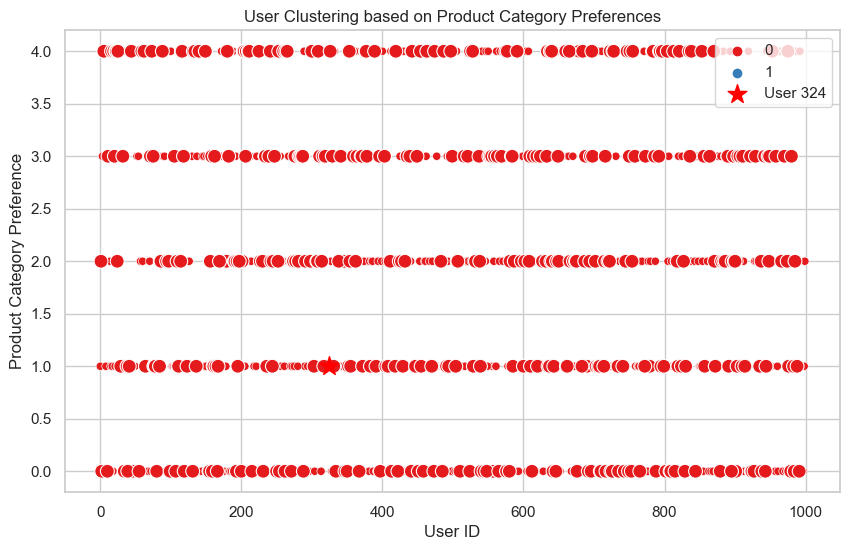

In [196]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Function to recommend products for a user based on user-to-user collaborative filtering
def recommend_products(user_id, df, cluster_col='Cluster', top_n=5):
    user_cluster = df[df['User_ID'] == user_id][cluster_col].iloc[0]
    similar_users = df[df[cluster_col] == user_cluster]
    
    # Exclude the user himself/herself from similar users
    similar_users = similar_users[similar_users['User_ID'] != user_id]
    
    # Aggregate preferences of similar users
    aggregated_preferences = similar_users.groupby('Product_Category_Preference').size().reset_index(name='Count')
    
    # Sort aggregated preferences by count in descending order
    aggregated_preferences = aggregated_preferences.sort_values(by='Count', ascending=False)
    
    # Get top N recommendations
    top_recommendations = aggregated_preferences.head(top_n)['Product_Category_Preference'].tolist()
    
    return top_recommendations, similar_users

# Example: Recommend products for a specific user and plot cluster graph
def plot_cluster_graph(user_id_to_recommend, df, cluster_col='Cluster', top_n_recommendations=5):
    recommendations, similar_users = recommend_products(user_id_to_recommend, df, cluster_col, top_n_recommendations)
    
    # Plot cluster graph
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x='User_ID', y='Product_Category_Preference', hue=cluster_col, palette='Set1', legend='full')
    plt.title('User Clustering based on Product Category Preferences')
    
    # Highlight similar users
    sns.scatterplot(data=similar_users, x='User_ID', y='Product_Category_Preference', hue=cluster_col, palette='Set1', legend=False, marker='o', s=100)
    
    # Highlight the user to recommend
    plt.scatter(user_id_to_recommend, df[df['User_ID'] == user_id_to_recommend]['Product_Category_Preference'], color='red', marker='*', s=200, label=f'User {user_id_to_recommend}')
    
    plt.legend()
    plt.xlabel('User ID')
    plt.ylabel('Product Category Preference')
    plt.grid(True)
    plt.show()

# Example usage
user_id_to_recommend = 324  # Replace with an actual user ID from your dataset
top_n_recommendations = 5  # Number of top recommendations to retrieve

plot_cluster_graph(user_id_to_recommend, df, cluster_col='Cluster', top_n_recommendations=top_n_recommendations)


# Model Testing

In [197]:
import pandas as pd

# Example product_category_names dictionary
product_category_names = {
    0: 'Books',
    1: 'Electronics',
    2: 'Clothing',
    3: 'Sports',
    4: 'Home & Kitchen'
    # Add more mappings as per your dataset
}

# Function to recommend products for a user based on user-to-user collaborative filtering
def recommend_products(user_id, df, cluster_col='Cluster', top_n=5):
    # Identify the cluster for the given user
    user_cluster = df[df['User_ID'] == user_id][cluster_col].iloc[0]
    
    # Find similar users in the same cluster
    similar_users = df[df[cluster_col] == user_cluster]
    
    # Exclude the user themselves from the similar users
    similar_users = similar_users[similar_users['User_ID'] != user_id]
    
    # Aggregate preferences of similar users
    aggregated_preferences = similar_users.groupby('Product_Category_Preference').size().reset_index(name='Count')
    
    # Sort aggregated preferences by count in descending order
    aggregated_preferences = aggregated_preferences.sort_values(by='Count', ascending=False)
    
    # Get top N recommendations
    top_recommendations = aggregated_preferences.head(top_n)
    
    # Map Product Category Preference to Product Names
    top_recommendations['Product_Name'] = top_recommendations['Product_Category_Preference'].map(product_category_names)
    
    # Prepare the output
    recommendations = top_recommendations[['Product_Category_Preference', 'Product_Name']].to_dict(orient='records')
    
    return recommendations

# Example: Recommend products for a specific user
user_id_to_recommend = 98  # Replace with an actual user ID from your dataset
top_n_recommendations = 5  # Number of top recommendations to retrieve

recommendations = recommend_products(user_id_to_recommend, df, cluster_col='Cluster', top_n=top_n_recommendations)

# Print recommendations
print(f"Top {top_n_recommendations} Recommendations for User ID {user_id_to_recommend}:")
for rec in recommendations:
    print(f"Product Category: {rec['Product_Category_Preference']}, Product Name: {rec['Product_Name']}")


Top 5 Recommendations for User ID 98:
Product Category: 0, Product Name: Books
Product Category: 2, Product Name: Clothing
Product Category: 1, Product Name: Electronics
Product Category: 4, Product Name: Home & Kitchen
Product Category: 3, Product Name: Sports


C:\Users\Dheeraj saroj\AppData\Local\Temp\ipykernel_20924\1030542533.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_recommendations['Product_Name'] = top_recommendations['Product_Category_Preference'].map(product_category_names)


In [198]:
import pandas as pd

# Example product_category_names dictionary
product_category_names = {
    0: 'Books',
    1: 'Electronics',
    2: 'Clothing',
    3: 'Sports',
    4: 'Home & Kitchen'
    # Add more mappings as per your dataset
}

# Function to recommend products for a user based on user-to-user collaborative filtering
def recommend_products(user_id, df, cluster_col='Cluster', top_n=5):
    # Identify the cluster for the given user
    user_cluster = df[df['User_ID'] == user_id][cluster_col].iloc[0]
    
    # Find similar users in the same cluster
    similar_users = df[df[cluster_col] == user_cluster]
    
    # Exclude the user themselves from the similar users
    similar_users = similar_users[similar_users['User_ID'] != user_id]
    
    # Aggregate preferences of similar users
    aggregated_preferences = similar_users.groupby('Product_Category_Preference').size().reset_index(name='Count')
    
    # Sort aggregated preferences by count in descending order
    aggregated_preferences = aggregated_preferences.sort_values(by='Count', ascending=False)
    
    # Get top N recommendations
    top_recommendations = aggregated_preferences.head(top_n)
    
    # Map Product Category Preference to Product Names
    top_recommendations['Product_Name'] = top_recommendations['Product_Category_Preference'].map(product_category_names)
    
    # Prepare the output
    recommendations = top_recommendations[['Product_Category_Preference', 'Product_Name']].to_dict(orient='records')
    
    return recommendations

# Example: Recommend products for a specific user
user_id_to_recommend = 324  # Replace with an actual user ID from your dataset
top_n_recommendations = 5  # Number of top recommendations to retrieve

recommendations = recommend_products(user_id_to_recommend, df, cluster_col='Cluster', top_n=top_n_recommendations)

# Print recommendations
print(f"Top {top_n_recommendations} Recommendations for User ID {user_id_to_recommend}:")
for rec in recommendations:
    print(f"Product Category: {rec['Product_Category_Preference']}, Product Name: {rec['Product_Name']}")


Top 5 Recommendations for User ID 324:
Product Category: 0, Product Name: Books
Product Category: 2, Product Name: Clothing
Product Category: 3, Product Name: Sports
Product Category: 4, Product Name: Home & Kitchen
Product Category: 1, Product Name: Electronics


C:\Users\Dheeraj saroj\AppData\Local\Temp\ipykernel_20924\3952162017.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_recommendations['Product_Name'] = top_recommendations['Product_Category_Preference'].map(product_category_names)


# Model Evaulation using Silhouette score

In [199]:
from sklearn.metrics import silhouette_score

# Example: Evaluate clustering quality using silhouette score
features_for_clustering = ['Age', 'Gender', 'Location', 'Income', 'Interests']
kmeans = KMeans(n_clusters=2, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[features_for_clustering])

# Calculate silhouette score
silhouette_avg = silhouette_score(df[features_for_clustering], df['Cluster'])
print(f"Silhouette Score: {silhouette_avg}")


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score: 0.39846264541424176


# Evaluate silhouette score for different numbers of clusters

In [200]:
# Evaluate silhouette score for different numbers of clusters
features_for_clustering = ['Age', 'Gender', 'Location', 'Income', 'Interests', 'Total_Spending', 'Purchase_Frequency', 'Time_Spent_on_Site_Minutes', 'Pages_Viewed']
silhouette_scores = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    df2['Cluster'] = kmeans.fit_predict(df2[features_for_clustering])
    silhouette_score_value = silhouette_score(df2[features_for_clustering], df2['Cluster'])
    silhouette_scores.append(silhouette_score_value)
    print(f"For n_clusters={k}, silhouette score is {silhouette_score_value:.4f}")

# Choose the best number of clusters based on silhouette score
best_k = silhouette_scores.index(max(silhouette_scores)) + 2  # Adding 2 because range starts from 2
print(f"\nBest number of clusters based on silhouette score: {best_k}")

# Perform KMeans clustering with the best number of clusters
best_kmeans = KMeans(n_clusters=best_k, random_state=42)
df2['Cluster'] = best_kmeans.fit_predict(df2[features_for_clustering])

# Display the first few rows of df2 with clusters assigned
print("\nDataFrame with Clusters Assigned:")
print(df2.head())

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters=2, silhouette score is 0.3543


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters=3, silhouette score is 0.2245


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters=4, silhouette score is 0.2355


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters=5, silhouette score is 0.2130


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters=6, silhouette score is 0.2020


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters=7, silhouette score is 0.2001


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters=8, silhouette score is 0.2027


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters=9, silhouette score is 0.1851

Best number of clusters based on silhouette score: 2


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)



DataFrame with Clusters Assigned:
   User_ID  Product_Category_Preference       Age  Gender  Location    Income  \
0        0                            1  0.826087       1         1  0.137770   
1      112                            2  0.608696       0         0  0.645867   
2      223                            0  0.304348       0         1  0.630120   
3      334                            0  0.913043       0         1  0.396445   
4      445                            3  0.152174       1         1  0.227819   

   Interests  Total_Spending  Purchase_Frequency  Time_Spent_on_Site_Minutes  \
0          2        0.498056            0.777778                    0.974874   
1          3        0.042562            0.777778                    0.720268   
2          2        0.747698            0.111111                    0.509213   
3          0        0.872724            0.333333                    0.879397   
4          4        0.898302            0.555556                    0.085427  

# Feature Selection & Hyperparameter Tuning

# Adding new features and making new dataframe df2 

In [201]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Load your dataset
data = pd.read_csv('Ecommerce_product_recommendation.csv')

# Select necessary features
selected_features = ['User_ID', 'Product_Category_Preference', 'Age', 'Gender', 'Location', 'Income', 'Interests', 'Total_Spending', 'Purchase_Frequency', 'Time_Spent_on_Site_Minutes', 'Pages_Viewed']
df2 = data[selected_features]

# Handle missing values if any (this step is important for data integrity)
df2.fillna({'Age': df2['Age'].median(), 'Income': df2['Income'].mean(), 'Total_Spending': 0, 'Purchase_Frequency': 0, 'Time_Spent_on_Site_Minutes': 0, 'Pages_Viewed': 0}, inplace=True)

# Encode categorical variables
encoder = LabelEncoder()
df2['Gender'] = encoder.fit_transform(df2['Gender'].astype(str))
df2['Location'] = encoder.fit_transform(df2['Location'].astype(str))
df2['Interests'] = encoder.fit_transform(df2['Interests'].astype(str))

# Encode Product_Category_Preference and User_ID
df2['Product_Category_Preference'] = encoder.fit_transform(df2['Product_Category_Preference'])
df2['User_ID'] = encoder.fit_transform(df2['User_ID'])

# Normalize numerical features
scaler = MinMaxScaler()
df2[['Age', 'Income', 'Total_Spending', 'Purchase_Frequency', 'Time_Spent_on_Site_Minutes', 'Pages_Viewed']] = scaler.fit_transform(df2[['Age', 'Income', 'Total_Spending', 'Purchase_Frequency', 'Time_Spent_on_Site_Minutes', 'Pages_Viewed']])




C:\Users\Dheeraj saroj\AppData\Local\Temp\ipykernel_20924\228112204.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.fillna({'Age': df2['Age'].median(), 'Income': df2['Income'].mean(), 'Total_Spending': 0, 'Purchase_Frequency': 0, 'Time_Spent_on_Site_Minutes': 0, 'Pages_Viewed': 0}, inplace=True)
C:\Users\Dheeraj saroj\AppData\Local\Temp\ipykernel_20924\228112204.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Gender'] = encoder.fit_transform(df2['Gender'].astype(str))
C:\Users\Dheeraj saroj\AppData\Local\Temp\ipykernel_20924\228112204.py:19: Se

# Evaluate different numbers of clusters  on df2

In [202]:
# Define the range of clusters to evaluate
min_clusters = 2
max_clusters = 10

# Initialize lists to store evaluation metrics
silhouette_scores = []
davies_bouldin_scores = []
calinski_harabasz_scores = []
inertia_scores = []

# Evaluate different numbers of clusters
for k in range(min_clusters, max_clusters + 1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    df2['Cluster'] = kmeans.fit_predict(df2[selected_features])
    
    # Compute evaluation metrics
    silhouette_scores.append(silhouette_score(df2[selected_features], df2['Cluster']))
    davies_bouldin_scores.append(davies_bouldin_score(df2[selected_features], df2['Cluster']))
    calinski_harabasz_scores.append(calinski_harabasz_score(df2[selected_features], df2['Cluster']))
    inertia_scores.append(kmeans.inertia_)
    
# Print evaluation scores
print(f"Number of Clusters | Silhouette Score | Davies-Bouldin Score | Calinski-Harabasz Score | Within-cluster Inertia")
print("-" * 100)
for i in range(len(range(min_clusters, max_clusters + 1))):
    print(f"{i+min_clusters:2d}                  | {silhouette_scores[i]:.4f}             | {davies_bouldin_scores[i]:.4f}               | {calinski_harabasz_scores[i]:.4f}                | {inertia_scores[i]:.2f}")



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Dheeraj saroj\AppData\Local\Temp\ipykernel_20924\4170432529.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Cluster'] = kmeans.fit_predict(df2[selected_features])
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Dheeraj saroj\A

Number of Clusters | Silhouette Score | Davies-Bouldin Score | Calinski-Harabasz Score | Within-cluster Inertia
----------------------------------------------------------------------------------------------------
 2                  | 0.6258             | 0.5003               | 2993.1846                | 20838926.63
 3                  | 0.5885             | 0.5005               | 3985.5996                | 9264810.36
 4                  | 0.5694             | 0.5009               | 4974.2704                | 5214291.78
 5                  | 0.5577             | 0.5014               | 5959.9336                | 3339051.83
 6                  | 0.5494             | 0.5018               | 6939.5934                | 2321016.59
 7                  | 0.5429             | 0.5025               | 7916.3840                | 1706601.05
 8                  | 0.5380             | 0.5031               | 8885.3364                | 1308321.18
 9                  | 0.5342             | 0.5038         

C:\Users\Dheeraj saroj\AppData\Local\Temp\ipykernel_20924\4170432529.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Cluster'] = kmeans.fit_predict(df2[selected_features])


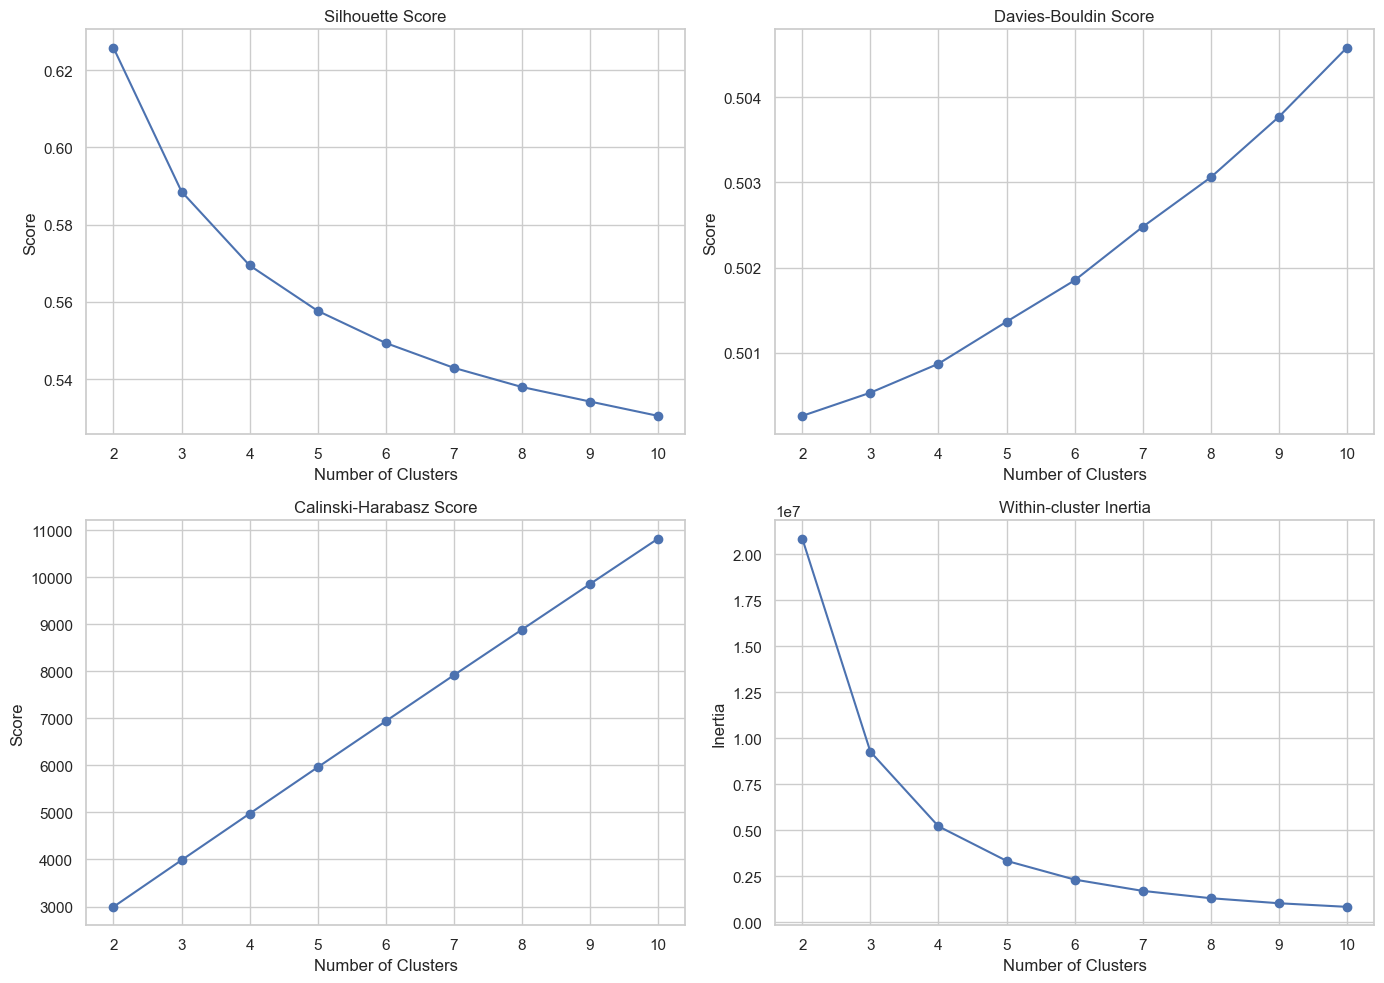

In [203]:
# Plotting the evaluation metrics
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 10))

# Silhouette Score plot
plt.subplot(2, 2, 1)
plt.plot(range(min_clusters, max_clusters + 1), silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')

# Davies-Bouldin Score plot
plt.subplot(2, 2, 2)
plt.plot(range(min_clusters, max_clusters + 1), davies_bouldin_scores, marker='o')
plt.title('Davies-Bouldin Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')

# Calinski-Harabasz Score plot
plt.subplot(2, 2, 3)
plt.plot(range(min_clusters, max_clusters + 1), calinski_harabasz_scores, marker='o')
plt.title('Calinski-Harabasz Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')

# Within-cluster Inertia plot
plt.subplot(2, 2, 4)
plt.plot(range(min_clusters, max_clusters + 1), inertia_scores, marker='o')
plt.title('Within-cluster Inertia')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

plt.tight_layout()
plt.show()

# Testing the hypertunned model 

In [205]:
import pandas as pd

# Example product_category_names dictionary
product_category_names = {
    0: 'Books',
    1: 'Electronics',
    2: 'Clothing',
    3: 'Sports',
    4: 'Home & Kitchen'
    # Add more mappings as per your dataset
}

# Function to recommend products for a user based on user-to-user collaborative filtering
def recommend_products(user_id, df, cluster_col='Cluster', product_category_names=None, top_n=5):
    # Identify the cluster for the given user
    user_cluster = df[df['User_ID'] == user_id][cluster_col].iloc[0]
    
    # Find similar users in the same cluster
    similar_users = df[df[cluster_col] == user_cluster]
    
    # Exclude the user themselves from the similar users
    similar_users = similar_users[similar_users['User_ID'] != user_id]
    
    # Aggregate preferences of similar users
    aggregated_preferences = similar_users.groupby('Product_Category_Preference').size().reset_index(name='Count')
    
    # Sort aggregated preferences by count in descending order
    aggregated_preferences = aggregated_preferences.sort_values(by='Count', ascending=False)
    
    # Get top N recommendations
    top_recommendations = aggregated_preferences.head(top_n)
    
    if product_category_names:
        # Map Product Category Preference to Product Names
        top_recommendations['Product_Name'] = top_recommendations['Product_Category_Preference'].map(product_category_names)
    else:
        # If product_category_names is not provided, use numeric IDs
        top_recommendations['Product_Name'] = top_recommendations['Product_Category_Preference']
    
    # Prepare the output
    recommendations = top_recommendations[['Product_Category_Preference', 'Product_Name']].to_dict(orient='records')
    
    return recommendations

# Example: Recommend products for a specific user using df2
user_id_to_recommend = 324  # Replace with an actual user ID from your dataset
top_n_recommendations = 5   # Number of top recommendations to retrieve

recommendations = recommend_products(user_id_to_recommend, df2, cluster_col='Cluster', product_category_names=product_category_names, top_n=top_n_recommendations)

# Print recommendations
print(f"Top {top_n_recommendations} Recommendations for User ID {user_id_to_recommend}:")
for rec in recommendations:
    print(f"Product Category: {rec['Product_Category_Preference']}, Product Name: {rec['Product_Name']}")


Top 5 Recommendations for User ID 324:
Product Category: 2, Product Name: Clothing
Product Category: 3, Product Name: Sports
Product Category: 4, Product Name: Home & Kitchen
Product Category: 1, Product Name: Electronics
Product Category: 0, Product Name: Books


C:\Users\Dheeraj saroj\AppData\Local\Temp\ipykernel_20924\1532007233.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_recommendations['Product_Name'] = top_recommendations['Product_Category_Preference'].map(product_category_names)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Dheeraj saroj\AppData\Local\Temp\ipykernel_20924\3328554357.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Cluster'] = kmeans.fit_predict(df2[selected_features])


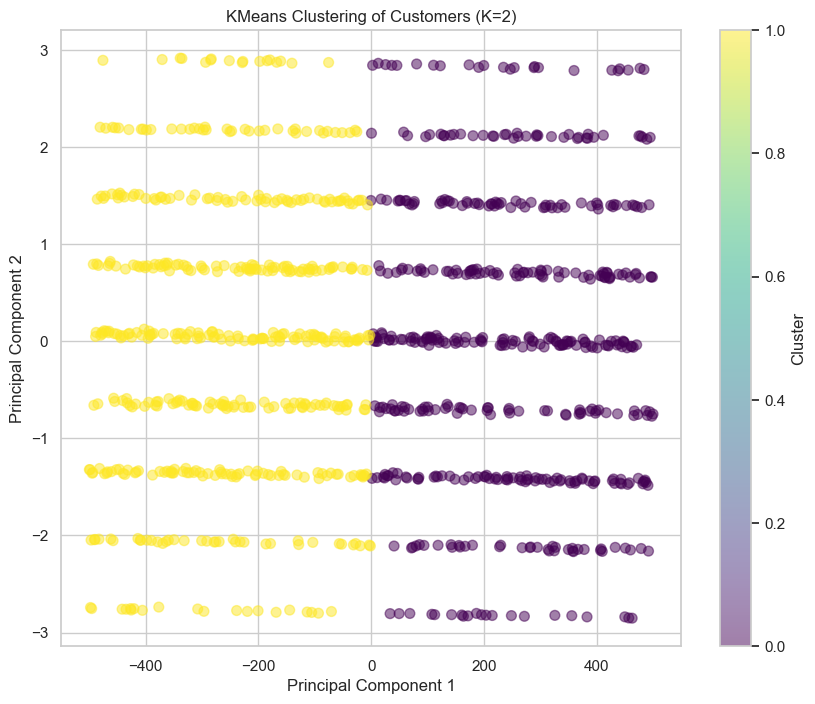

In [206]:
# Perform KMeans clustering with the best number of clusters
best_k = 2  # Replace with your chosen best number of clusters
kmeans = KMeans(n_clusters=best_k, random_state=42)
df2['Cluster'] = kmeans.fit_predict(df2[selected_features])

# Reduce dimensionality for visualization using PCA
pca = PCA(n_components=2, random_state=42)
df2_pca = pca.fit_transform(df2[selected_features])

# Plot clusters
plt.figure(figsize=(10, 8))
plt.scatter(df2_pca[:, 0], df2_pca[:, 1], c=df2['Cluster'], cmap='viridis', s=50, alpha=0.5)
plt.title(f'KMeans Clustering of Customers (K={best_k})')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

In [209]:
df


,User_ID,Product_Category_Preference,Age,Gender,Location,Income,Interests,Total_Spending,Purchase_Frequency,Cluster
0,0,1,0.826087,1,1,0.137770,2,0.498056,0.777778,0
1,112,2,0.608696,0,0,0.645867,3,0.042562,0.777778,0
2,223,0,0.304348,0,1,0.630120,2,0.747698,0.111111,0
3,334,0,0.913043,0,1,0.396445,0,0.872724,0.333333,1
4,445,3,0.152174,1,1,0.227819,4,0.898302,0.555556,0
...,...,...,...,...,...,...,...,...,...,...
995,996,0,0.086957,1,2,0.647223,3,0.101289,0.777778,0
996,997,0,0.478261,1,2,0.607476,4,0.065275,0.333333,0
997,998,1,0.195652,0,2,0.402478,3,0.110088,0.888889,0
998,999,2,0.934783,1,0,0.305117,4,0.190096,0.333333,0


In [210]:
df2

,User_ID,Product_Category_Preference,Age,Gender,Location,Income,Interests,Total_Spending,Purchase_Frequency,Time_Spent_on_Site_Minutes,Pages_Viewed,Cluster
0,0,1,0.826087,1,1,0.137770,2,0.498056,0.777778,0.974874,0.770833,0
1,112,2,0.608696,0,0,0.645867,3,0.042562,0.777778,0.720268,0.812500,0
2,223,0,0.304348,0,1,0.630120,2,0.747698,0.111111,0.509213,0.000000,0
3,334,0,0.913043,0,1,0.396445,0,0.872724,0.333333,0.879397,0.583333,0
4,445,3,0.152174,1,1,0.227819,4,0.898302,0.555556,0.085427,0.187500,0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,0,0.086957,1,2,0.647223,3,0.101289,0.777778,0.904523,0.416667,1
996,997,0,0.478261,1,2,0.607476,4,0.065275,0.333333,0.597990,0.062500,1
997,998,1,0.195652,0,2,0.402478,3,0.110088,0.888889,0.551089,0.687500,1
998,999,2,0.934783,1,0,0.305117,4,0.190096,0.333333,0.711893,0.562500,1


In [147]:
# Function to recommend products for a user based on user-to-user collaborative filtering within the selected cluster
def recommend_products_selected_features(user_id, df, cluster_col='Cluster', top_n=5):
    # Identify the cluster for the given user
    user_cluster = df[df['User_ID'] == user_id][cluster_col].iloc[0]
    
    # Find similar users in the same cluster
    similar_users = df[df[cluster_col] == user_cluster]
    
    # Exclude the user themselves from the similar users
    similar_users = similar_users[similar_users['User_ID'] != user_id]
    
    # Aggregate preferences of similar users
    aggregated_preferences = similar_users.groupby('Product_Category_Preference').size().reset_index(name='Count')
    
    # Sort aggregated preferences by count in descending order
    aggregated_preferences = aggregated_preferences.sort_values(by='Count', ascending=False)
    
    # Get top N recommendations
    top_recommendations = aggregated_preferences.head(top_n)
    
    # Map Product Category Preference to Product Names
    product_category_names = {
        0: 'Books',
        1: 'Electronics',
        2: 'Clothing',
        3: 'Sports',
        4: 'Home & Kitchen'
        # Add more mappings as per your dataset
    }
    top_recommendations['Product_Name'] = top_recommendations['Product_Category_Preference'].map(product_category_names)
    
    # Prepare the output
    recommendations = top_recommendations[['Product_Category_Preference', 'Product_Name']].to_dict(orient='records')
    
    return recommendations

# Example: Recommend products for a specific user
user_id_to_recommend = 324  # Replace with an actual user ID from your dataset
top_n_recommendations = 5   # Number of top recommendations to retrieve

recommendations = recommend_products_selected_features(user_id_to_recommend, df2, cluster_col='Cluster', top_n=top_n_recommendations)

# Print recommendations
print(f"Top {top_n_recommendations} Recommendations for User ID {user_id_to_recommend} using selected_features:")
for rec in recommendations:
    print(f"Product Category: {rec['Product_Category_Preference']}, Product Name: {rec['Product_Name']}")

Top 5 Recommendations for User ID 324 using selected_features:
Product Category: 3, Product Name: Sports
Product Category: 1, Product Name: Electronics
Product Category: 4, Product Name: Home & Kitchen
Product Category: 0, Product Name: Books
Product Category: 2, Product Name: Clothing


C:\Users\Dheeraj saroj\AppData\Local\Temp\ipykernel_20924\3159854565.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_recommendations['Product_Name'] = top_recommendations['Product_Category_Preference'].map(product_category_names)


In [56]:
df

,User_ID,Product_Category_Preference,Age,Gender,Location,Income,Interests,Total_Spending,Purchase_Frequency,Cluster
0,0,1,0.826087,1,1,0.137770,2,0.498056,0.777778,0
1,112,2,0.608696,0,0,0.645867,3,0.042562,0.777778,1
2,223,0,0.304348,0,1,0.630120,2,0.747698,0.111111,0
3,334,0,0.913043,0,1,0.396445,0,0.872724,0.333333,2
4,445,3,0.152174,1,1,0.227819,4,0.898302,0.555556,1
...,...,...,...,...,...,...,...,...,...,...
995,996,0,0.086957,1,2,0.647223,3,0.101289,0.777778,1
996,997,0,0.478261,1,2,0.607476,4,0.065275,0.333333,1
997,998,1,0.195652,0,2,0.402478,3,0.110088,0.888889,1
998,999,2,0.934783,1,0,0.305117,4,0.190096,0.333333,1


In [167]:
df2

,User_ID,Product_Category_Preference,Age,Gender,Location,Income,Interests,Total_Spending,Purchase_Frequency,Time_Spent_on_Site_Minutes,Pages_Viewed,Cluster
0,0,1,0.826087,1,1,0.137770,2,0.498056,0.777778,0.974874,0.770833,0
1,112,2,0.608696,0,0,0.645867,3,0.042562,0.777778,0.720268,0.812500,0
2,223,0,0.304348,0,1,0.630120,2,0.747698,0.111111,0.509213,0.000000,0
3,334,0,0.913043,0,1,0.396445,0,0.872724,0.333333,0.879397,0.583333,0
4,445,3,0.152174,1,1,0.227819,4,0.898302,0.555556,0.085427,0.187500,0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,0,0.086957,1,2,0.647223,3,0.101289,0.777778,0.904523,0.416667,1
996,997,0,0.478261,1,2,0.607476,4,0.065275,0.333333,0.597990,0.062500,1
997,998,1,0.195652,0,2,0.402478,3,0.110088,0.888889,0.551089,0.687500,1
998,999,2,0.934783,1,0,0.305117,4,0.190096,0.333333,0.711893,0.562500,1


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


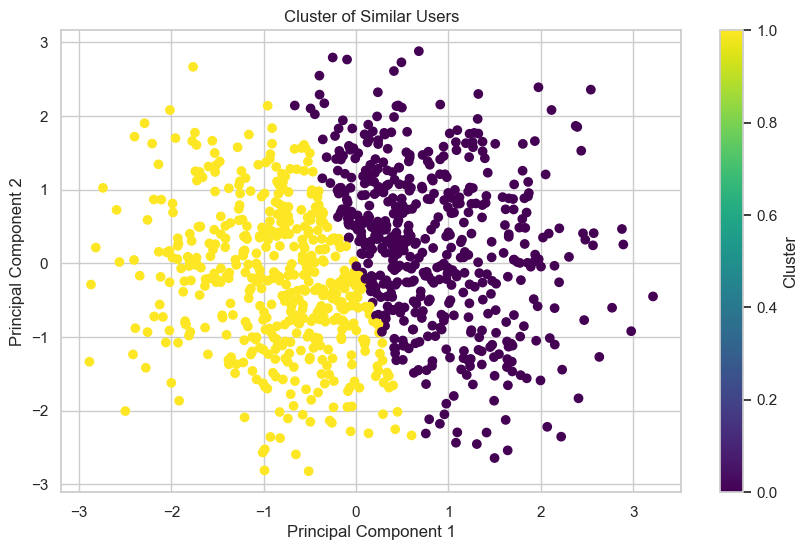

In [211]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Assuming df2 is your dataframe with user features
# Drop non-numeric columns if any
numeric_cols = df2.drop(columns=['User_ID', 'Product_Category_Preference']).columns

# Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df2[numeric_cols])

# Apply PCA to reduce dimensions to 2 components for visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)

# Apply K-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(principal_components)

# Visualize clusters
plt.figure(figsize=(10, 6))
scatter = plt.scatter(principal_components[:, 0], principal_components[:, 1], c=clusters, cmap='viridis')
plt.title('Cluster of Similar Users')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, label='Cluster')
plt.grid(True)
plt.show()
